In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC 

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("C:/Users/SANJAY/Desktop/ExcelR/Assignments/Assignment - 15/Random Forest/Company_Data (1).csv")
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
df.shape

(400, 11)

In [4]:
df.isnull().any()

Sales          False
CompPrice      False
Income         False
Advertising    False
Population     False
Price          False
ShelveLoc      False
Age            False
Education      False
Urban          False
US             False
dtype: bool

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


<AxesSubplot:>

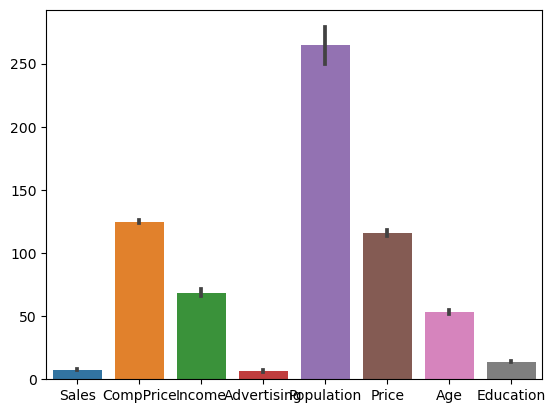

In [6]:
sns.barplot(data=df)

In [7]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [8]:
import pandas_profiling as pp
pp.ProfileReport(df,minimal=True)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
import sweetviz as sv
sweet_report = sv.analyze(df)
sweet_report.show_html('Sales.html')

                                             |                                             | [  0%]   00:00 ->…

Report Sales.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [10]:
df.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


<AxesSubplot:>

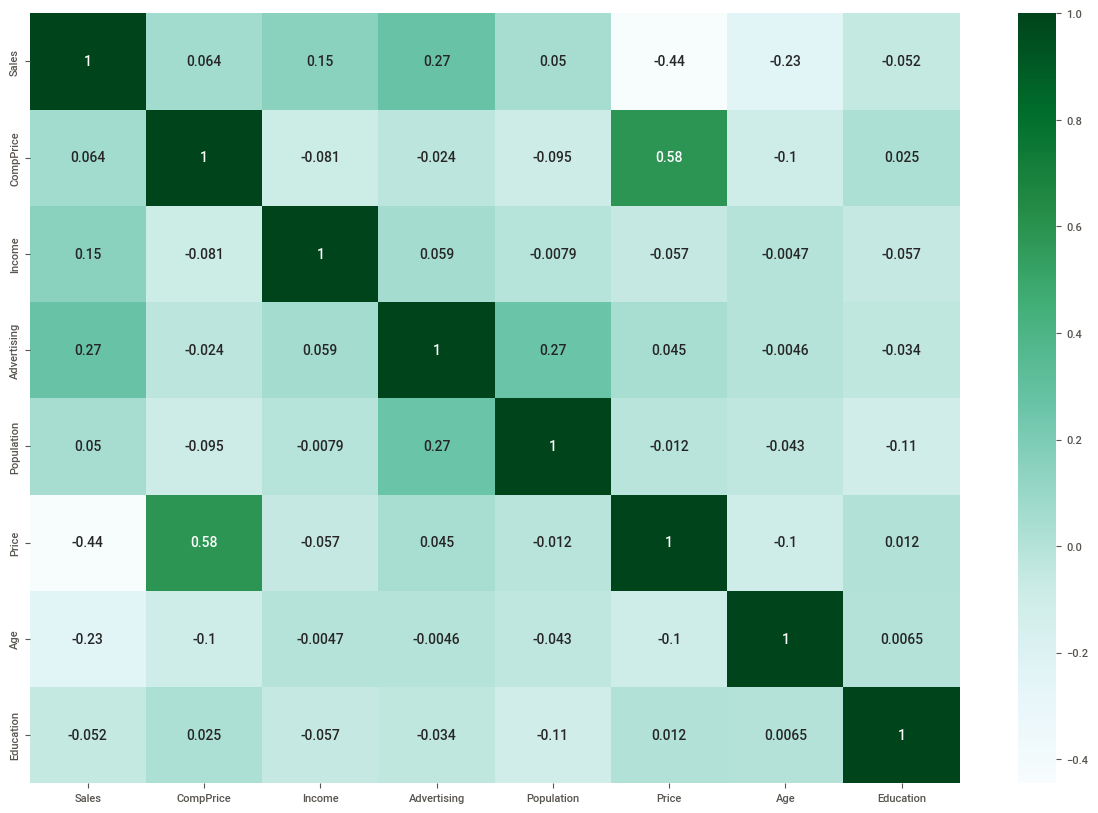

In [11]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='BuGn')

In [12]:
# label encoding
label_encoder = LabelEncoder()
df['ShelveLoc'] = label_encoder.fit_transform(df['ShelveLoc'])
df['Urban'] = label_encoder.fit_transform(df['Urban'])
df['US'] = label_encoder.fit_transform(df['US'])

In [13]:
# Converting the sales column into categorical column based on the 50th percentile value (7.49)(below 50th perc- Low, above 50th prec- High)
sales_cat=[]
for value in df['Sales']:
    if value >= 7.49:
        sales_cat.append("High")
    else:
        sales_cat.append('Low')
        
df['Sales'] = sales_cat
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,High,138,73,11,276,120,0,42,17,1,1
1,High,111,48,16,260,83,1,65,10,1,1
2,High,113,35,10,269,80,2,59,12,1,1
3,Low,117,100,4,466,97,2,55,14,1,1
4,Low,141,64,3,340,128,0,38,13,1,0


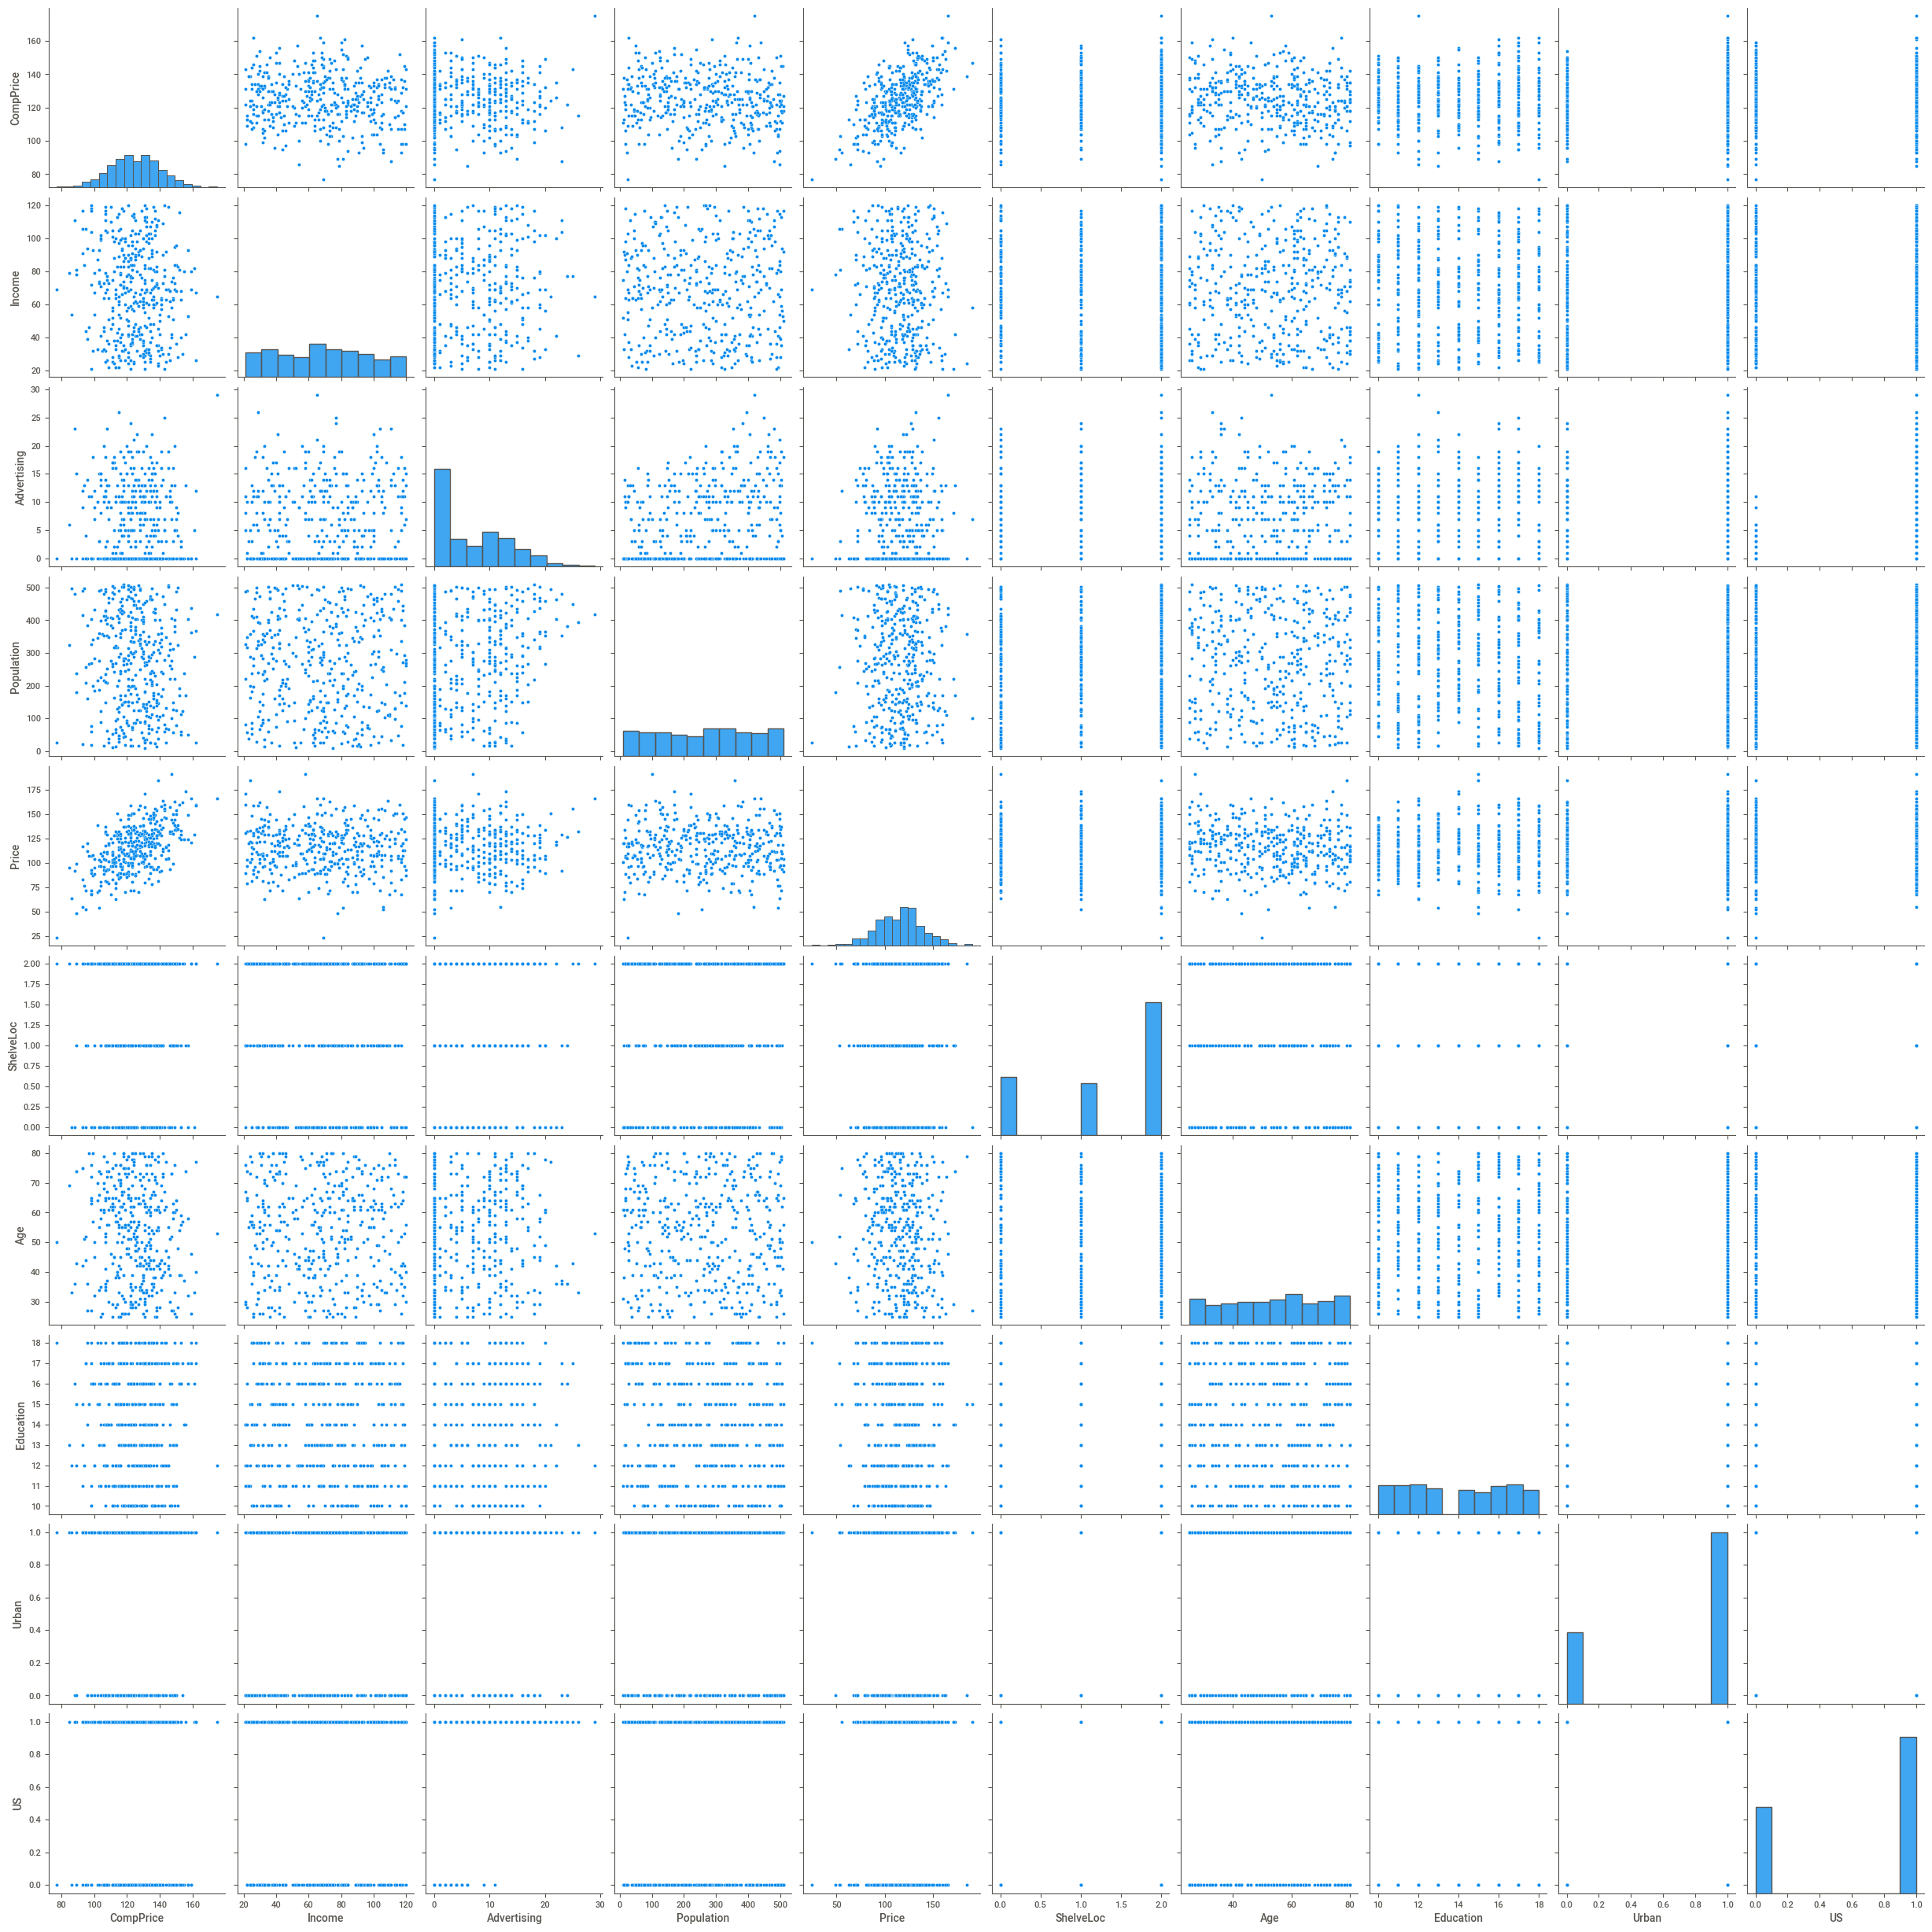

In [14]:
sns.pairplot(df)

In [15]:
#Declaring the dependent and independent variable
X = df.drop(['Sales'],axis=1)
Y = df['Sales']

In [16]:
X

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [17]:
Y

0      High
1      High
2      High
3       Low
4       Low
       ... 
395    High
396     Low
397     Low
398     Low
399    High
Name: Sales, Length: 400, dtype: object

In [18]:
Y.value_counts()

High    201
Low     199
Name: Sales, dtype: int64

In [19]:
Y.unique()

array(['High', 'Low'], dtype=object)

# Spliting and training the data

In [20]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [21]:
X_train.shape, X_test.shape, Y_train.shape,  Y_test.shape

((320, 10), (80, 10), (320,), (80,))

# Model Building using Random forest

In [22]:
model = RandomForestClassifier(n_estimators=100,criterion='entropy',max_features=3)
model.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', max_features=3)

In [23]:
pred = model.predict(X_test)
pred

array(['Low', 'Low', 'High', 'Low', 'High', 'Low', 'High', 'High', 'High',
       'High', 'Low', 'High', 'High', 'Low', 'Low', 'High', 'High',
       'High', 'High', 'Low', 'High', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'High', 'Low', 'Low', 'High', 'High', 'Low', 'Low', 'High',
       'Low', 'Low', 'High', 'High', 'Low', 'Low', 'Low', 'High', 'High',
       'High', 'Low', 'Low', 'High', 'Low', 'Low', 'High', 'High', 'High',
       'Low', 'High', 'Low', 'Low', 'High', 'High', 'High', 'High',
       'High', 'Low', 'Low', 'High', 'High', 'High', 'High', 'Low',
       'High', 'Low', 'High', 'High', 'Low', 'High', 'High', 'High',
       'High', 'Low', 'High'], dtype=object)

In [24]:
model.score(X_test,Y_test)

0.8125

In [25]:
model.score(X_train,Y_train)

1.0

In [26]:
print(np.mean(Y_test==pred))

0.8125


# Applying K-Fold cross Validation

In [27]:
kfold = KFold(n_splits=10)
results = cross_val_score(model,X,Y,cv=kfold)
print(results.mean())

0.7925


# USING BAGGING TECHNIQUE

In [28]:
model = RandomForestClassifier(n_estimators=100,criterion='entropy',max_features=3)

In [29]:
from sklearn.ensemble import BaggingClassifier
modelb = BaggingClassifier(base_estimator=model)
results = cross_val_score(modelb,X,Y,cv=kfold)
print(results.mean())

0.8


# USING ADABOOST TECHNIQUE

In [30]:
from sklearn.ensemble import AdaBoostClassifier
modela = AdaBoostClassifier(base_estimator=model)
results = cross_val_score(modela,X,Y,cv=kfold)
print(results.mean())

0.82


# USING VOTING CLASSIFIER

In [31]:
estimators = []

model1 = LogisticRegression(max_iter=500)
estimators.append(('logistic',model1))

model2 = DecisionTreeClassifier()
estimators.append(('cart',model2))

model3 = SVC()
estimators.append(('svm',model3))

model4 = AdaBoostClassifier(base_estimator=model)
estimators.append(('adaboost',model4))

model5 = BaggingClassifier(base_estimator=model)
estimators.append(('bagging',model5))

model6 = RandomForestClassifier(n_estimators=100,criterion='entropy',max_features=3)
estimators.append(('RandomForest',model6))


ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble,X,Y, cv=kfold)
print(results)

[0.85  0.875 0.725 0.775 0.775 0.9   0.775 0.825 0.875 0.825]


In [32]:
print(results.mean())

0.82
